In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#Importando classificadores
import nbimporter
from preprocessamento import gerar_target
from preprocessamento import preprocessar

Importing Jupyter notebook from preprocessamento.ipynb


### Carregamento dos dados, e preprocessamento

In [21]:
data_2016 = pd.read_csv('respostas_2016.csv')

In [22]:
dados_2016 = preprocessar(data_2016)

In [23]:
target = gerar_target(data_2016)

In [17]:
dados_2016.shape

(237, 29)

### Gerando Feature Importace com Extra Tree Classifier

In [6]:
from sklearn.ensemble import ExtraTreesClassifier

In [7]:
forest = ExtraTreesClassifier()

In [8]:
forest.fit(dados_2016, target)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [9]:
importances = forest.feature_importances_

In [10]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)

In [11]:
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 25 (0.052910)
2. feature 17 (0.048541)
3. feature 21 (0.048444)
4. feature 16 (0.047701)
5. feature 10 (0.047404)
6. feature 24 (0.047237)
7. feature 14 (0.046787)
8. feature 26 (0.045201)
9. feature 6 (0.044895)
10. feature 22 (0.044422)
11. feature 20 (0.044293)
12. feature 11 (0.043772)
13. feature 18 (0.043366)
14. feature 28 (0.043177)
15. feature 3 (0.041911)
16. feature 23 (0.041839)
17. feature 19 (0.040734)
18. feature 15 (0.039194)
19. feature 2 (0.038736)
20. feature 9 (0.033896)
21. feature 27 (0.033221)
22. feature 0 (0.031666)
23. feature 4 (0.011187)
24. feature 12 (0.010781)
25. feature 7 (0.009870)
26. feature 1 (0.007468)
27. feature 8 (0.006881)
28. feature 5 (0.004467)
29. feature 13 (0.000000)


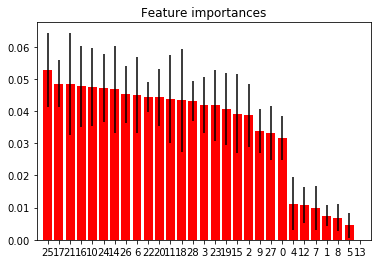

In [12]:
print("Feature ranking:")

for f in range(dados_2016.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(dados_2016.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(dados_2016.shape[1]), indices)
plt.xlim([-1, dados_2016.shape[1]])
plt.show()

### Gerando Feature Importace com RamdomForest

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
clf = RandomForestClassifier(max_depth=10, random_state=0)

In [16]:
clf.fit(dados_2016, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [17]:
importances = clf.feature_importances_

In [18]:
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)

In [19]:
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 14 (0.056529)
2. feature 23 (0.054098)
3. feature 26 (0.053582)
4. feature 18 (0.051392)
5. feature 16 (0.048026)
6. feature 17 (0.045907)
7. feature 11 (0.045763)
8. feature 15 (0.045723)
9. feature 2 (0.044643)
10. feature 3 (0.044332)
11. feature 27 (0.044127)
12. feature 20 (0.044001)
13. feature 22 (0.042361)
14. feature 28 (0.041873)
15. feature 10 (0.041467)
16. feature 6 (0.040621)
17. feature 24 (0.039418)
18. feature 25 (0.039166)
19. feature 9 (0.038001)
20. feature 21 (0.037394)
21. feature 19 (0.033636)
22. feature 0 (0.026693)
23. feature 7 (0.012778)
24. feature 12 (0.011920)
25. feature 4 (0.007030)
26. feature 8 (0.005809)
27. feature 1 (0.002152)
28. feature 5 (0.001559)
29. feature 13 (0.000000)


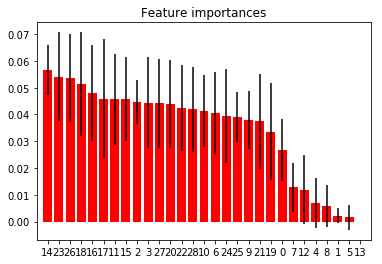

In [20]:
print("Feature ranking:")

for f in range(dados_2016.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(dados_2016.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(dados_2016.shape[1]), indices)
plt.xlim([-1, dados_2016.shape[1]])
plt.show()

### Gerando Feature Importace com RandomTreesEmbedding

In [29]:
from sklearn.ensemble import RandomTreesEmbedding

In [32]:
rte = RandomForestClassifier(n_estimators=10, random_state=0, max_depth=3)

In [34]:
rte.fit(dados_2016, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [35]:
importances = rte.feature_importances_

In [38]:
std = np.std([rte.feature_importances_ for tree in rte.estimators_],axis=0)

In [39]:
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 23 (0.160689)
2. feature 26 (0.154220)
3. feature 25 (0.071386)
4. feature 22 (0.063458)
5. feature 21 (0.059625)
6. feature 20 (0.058158)
7. feature 27 (0.053235)
8. feature 19 (0.045955)
9. feature 0 (0.037527)
10. feature 6 (0.035777)
11. feature 24 (0.034704)
12. feature 10 (0.030764)
13. feature 9 (0.028926)
14. feature 15 (0.024229)
15. feature 11 (0.021034)
16. feature 4 (0.020538)
17. feature 17 (0.019579)
18. feature 28 (0.019280)
19. feature 14 (0.015396)
20. feature 7 (0.009974)
21. feature 1 (0.009742)
22. feature 3 (0.008791)
23. feature 2 (0.008524)
24. feature 12 (0.008488)
25. feature 13 (0.000000)
26. feature 8 (0.000000)
27. feature 16 (0.000000)
28. feature 5 (0.000000)
29. feature 18 (0.000000)


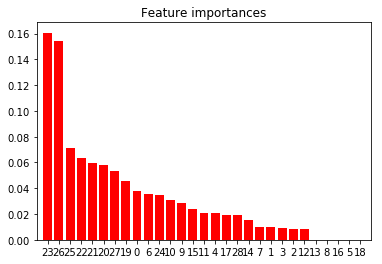

In [40]:
print("Feature ranking:")

for f in range(dados_2016.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(dados_2016.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(dados_2016.shape[1]), indices)
plt.xlim([-1, dados_2016.shape[1]])
plt.show()